Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (2)
## 21.04.2020. 

# Stefan Brankovic

***
<font color='red'>
Preimenovati svesku: File/Rename u __saobracaj2_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Model sa promenljivom brzinom
Simulirati model protoka saobraćaja koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + \frac{\partial}{\partial x}\left(v(\rho)\rho(x,t)\right) = 0
\end{equation}

u kome brzina vozila nije konstantna već zavisi od gustine (a samim tim i od koordinate $x$ i vremena $t$). 

U fajlu <font color='blue'>traffic_data.csv</font> nalaze se podaci dobijeni snimanjem protoka saobraćaja u Linkoln tunelu, koji prolazi ispod reke Hadson i povezuje Nju Džersi sa centrom Menhetna. U prvoj koloni nalazi se gustina vozila (data u jedinicama kola/milji) a u drugoj koloni njhova brzina (data u jedinicama milja/sat).

a) Koristeći se pandas bibliotekom, napraviti Python skriptu u okviru koje treba učitati .csv fajl, a zatim konvertovati jedinice u kola/kilometru (1/km) i kilometar/sat (km/h) i prikazati ovu zavisnost u okviru jednog scatter grafika. Obeležiti ose grafika. 

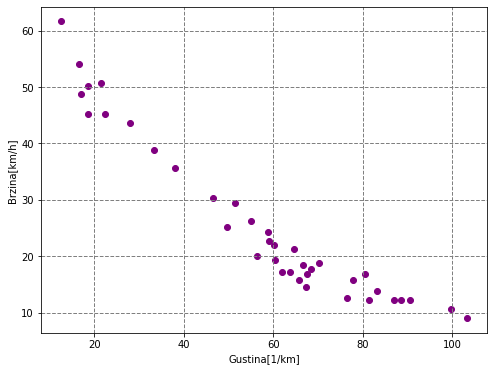

In [3]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

plt.figure(figsize=(8, 6))
traffic_data = pd.read_csv('traffic_data.csv')
gustina = traffic_data['gustina']/1.6
brzina = traffic_data['brzina']*1.6
plt.scatter(gustina, brzina, color='purple')
plt.xlabel('Gustina[1/km]')
plt.ylabel('Brzina[km/h]')
plt.grid(b = True, axis = 'both', color = 'grey', linewidth = 1, linestyle = '--' )
plt.show()

Grinšilds-ov model pretpostavlja linearnu zavisnost brzine od gustine i dat je sledećom linearnom funkcijom:

\begin{equation}
    v(\rho) = v_\text{m}\left(1 - \frac{\rho}{\rho_\text{m}}\right)
\end{equation}

gde je $v_\text{m}$ maksimalna brzina vozila, a $\rho_\text{m}$ maksimalna gustina vozila (kada bi sva vozila bila pozicionirana jedna iza drugog, bez razmaka). 

b) Koristeći <font color='blue'>scipy.optimize.curve_fit</font> (Python funkcija koja povlači optimalnu pravu kroz dati skup tačaka, pogledati help) pronaći koeficijente $v_\text{m}$ i $\rho_\text{m}$ koji definišu optimalnu pravu. Koeficijente pronaći u jedinicama km/h i 1/km, respektivno. Nacrtati grafik na kome su eksperimentalni podaci nacrtati crvenim tačkama, a optimalna prava plavom linijom. Obeležiti ose grafika i na grafik staviti legendu. 

(Napomena: ukoliko se čini da je dobijena maksimalna brzina vozila previše mala, treba imati na umu da u tunelu postoji rigorozno ograničenje brzine. Proveriti dobijenu vrednost iz Python modela sa realnim ograničenjem koje se može naći na linku: https://en.wikipedia.org/wiki/Lincoln_Tunnel pod stavkom “operating speed”).


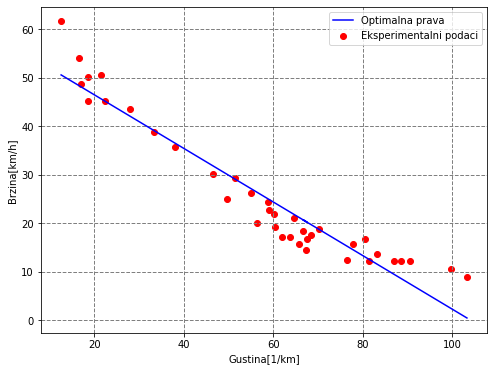

57.574458040688086
104.15370454250608


In [4]:
def Grinsild(r, rm, vm):
  return vm * (1 - r/rm)

plt.figure(figsize = (8,6))
popt, pcov = curve_fit(Grinsild, gustina, brzina)
vm = popt[1]
rm = popt[0]
y = Grinsild(gustina, rm, vm)
plt.scatter(gustina, brzina, color = "red", label = "Eksperimentalni podaci")
plt.plot(gustina, y, color = "blue", label = 'Optimalna prava')
plt.grid(b = True, axis = 'both', color = 'grey', linewidth = 1, linestyle = '--' )
plt.xlabel("Gustina[1/km]")
plt.ylabel("Brzina[km/h]")
plt.legend()
plt.show()

print(vm, rm, sep = '\n')

Uneti dobijene vrednosti za $v_\text{m}$ i $\rho_\text{m}$.

c) Uzimajući u obzir funkcijsku zavisnost brzine od gustine, srediti jednačinu u oblik pogodan za primenu metode konačnih razlika, tako da jednačina ima formu:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + c(\rho)\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

gde je $c(\rho)$ funkcija u kojoj kao promenljiva figuriše samo gustina $\rho$, a kao konstante maksimalna brzina $v_\text{m}$ i maksimalna gustina $\rho_\text{m}$. Napisati dobijenu funkciju $c(\rho)$:

Uneti izraz za $c(\rho)=v_m(1-2r/r_m)$.

d)	U daljem nastavku Python skripte primeniti metodu konačnih razlika za rešavanje gornje parcijalne diferencijalne jednačine koja modeluje protok saobraćaja. Na gornju jednačinu primeniti metodu konačnih razlika za sledeće parametre:

<ol>
    <li>Ukupna dužina posmatranog puta $L = 2.4$ km,</li>
    <li>Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li>Koraci diskretizacije: $\Delta x = 0.05$ km, $\Delta t = 0.1$ s.</li>
</ol>

Za rešavanje jednačine potrebno je poznavanje početnog, odnosno graničnog uslova. Početni i granični uslov treba definisati tako da se modeluje semafor koji na koordinati $x = 0$ u trenutku $t = 0$ prelazi iz crvenog u zeleno. Pretpostavka je da je crveno svetlo na semaforu trajalo dovoljno dugo tako da se u trenutku $t = 0$ sva vozila nalaze iza semafora, a da ispred semafora nema nijednog vozila. Simulirati dan kada je na putu nije bilo velike gužve, tj. kada gustina vozila iza semafora ima vrednost $0.3\rho_\text{m}$.


Napisati početni i granični uslov. 

Nacrtati 3D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ i $t$. Obeležiti ose grafika. 

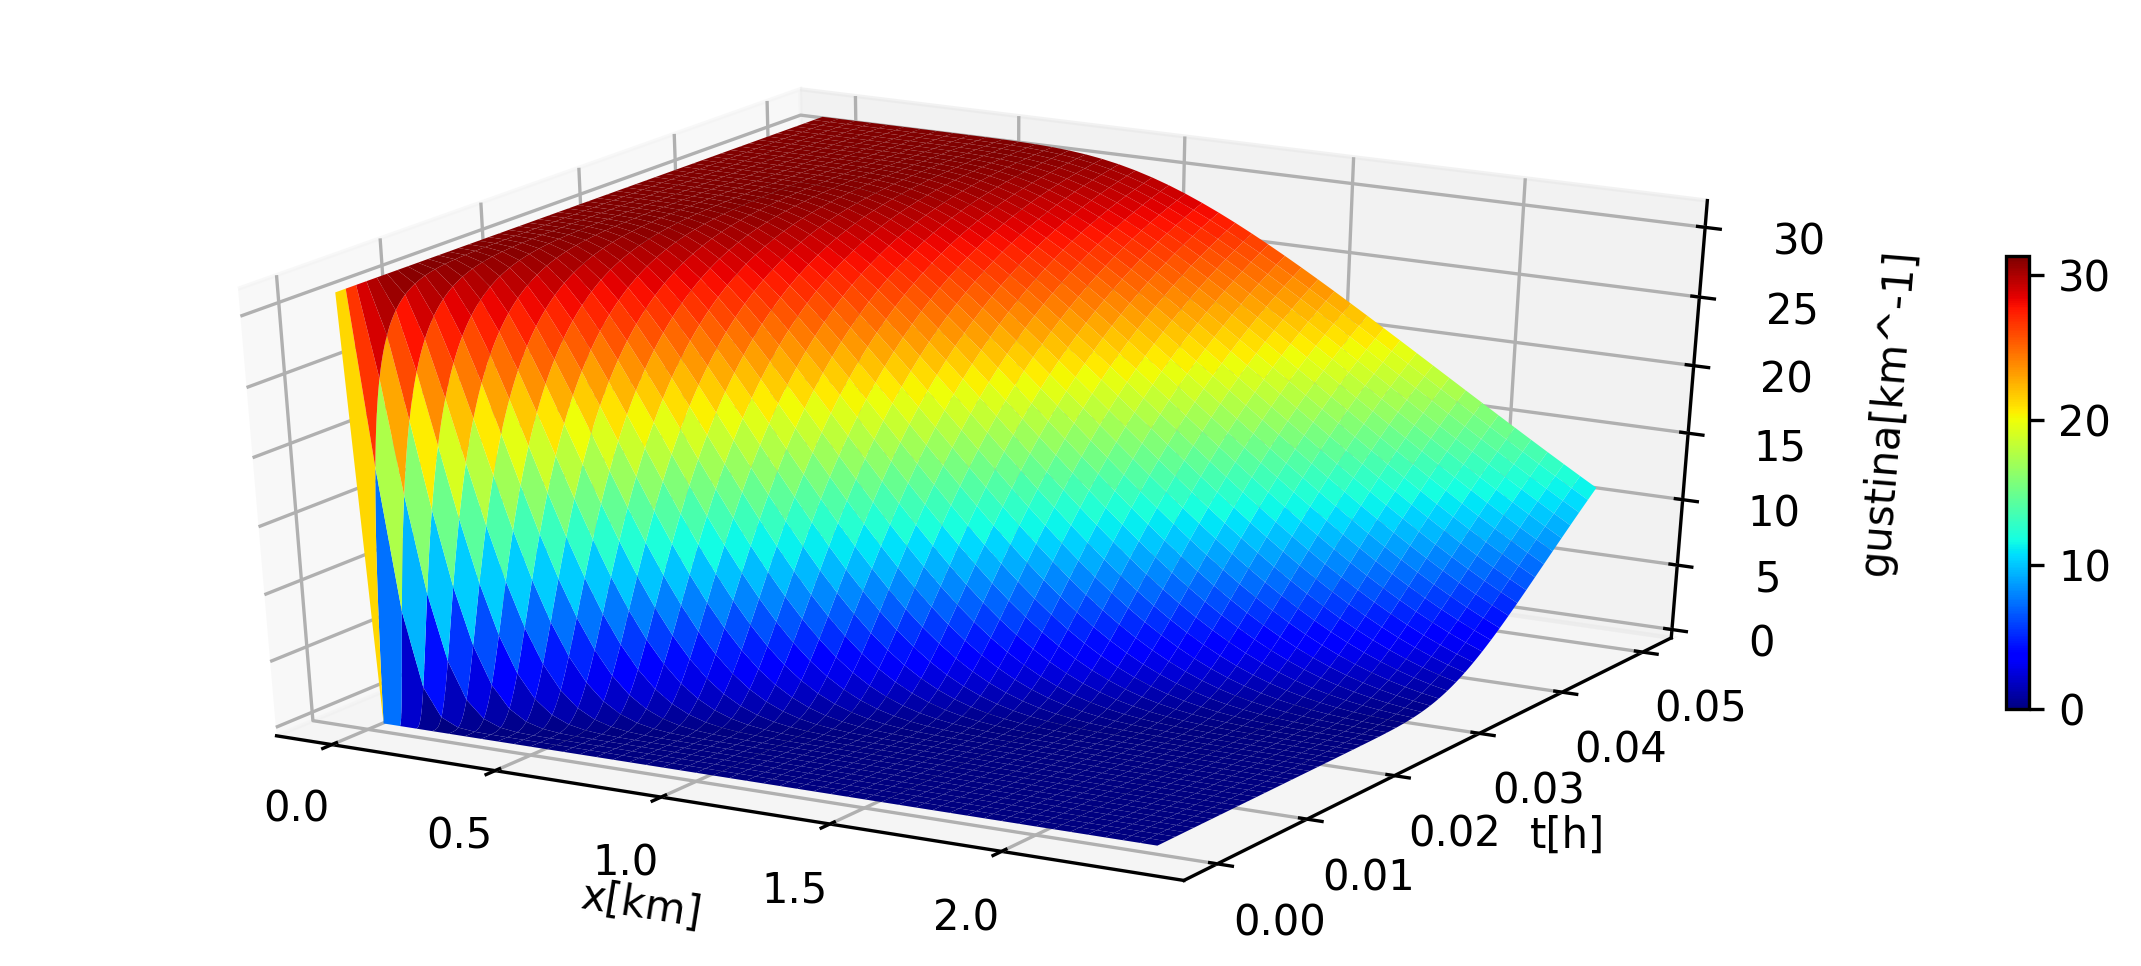

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(r, vm, rm):
    return vm*(1-2*r/rm)

L = 2.4
T = 180 / 3600
deltax = 0.05
deltat = 0.1 / 3600
rho0 = 0.3 * rm

x = np.arange(0, L, deltax)
t = np.arange(0, T, deltat)

dimx = np.size(x)
dimt = np.size(t)

rho = np.zeros((dimt, dimx))
rho[:,0] = rho0

for i in range(dimt - 1):
    for j in range(1, dimx, 1):
        rho[i + 1, j] = rho[i, j] - (f(rho[i, j], vm, rm) * (deltat/deltax) )* (rho[i, j] - rho[i, j - 1])
        
xosa, tosa = np.meshgrid(x, t)
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = fig.gca(projection = '3d')        
surf = ax.plot_surface(xosa, tosa, rho, cmap = cm.jet)
fig.colorbar(surf, shrink = 0.5)
ax.set_xlabel("x[km]")
ax.set_ylabel("t[h]")
ax.set_zlabel("gustina[km^-1]")
plt.show()  

Nacrtati 2D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ za tri vremenska trenutka (izabrati po želji, recimo $t = 100$, $120$ i $160$ sekudni ili neka druga tri vremenska trenutka koja bolje demonstriraju dinamiku promene gustine vozila). Obeležiti ose grafika i uneti legendu. 

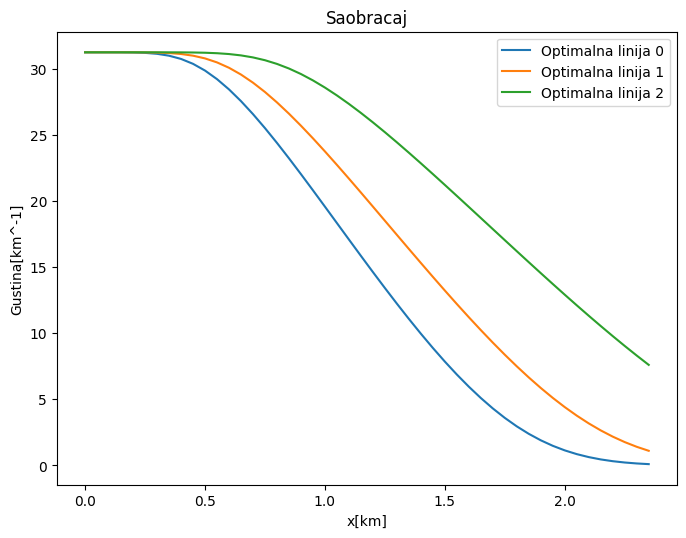

In [0]:
t1 = [100, 120, 160]
t = np.array(t1)/3600
t = t / deltat

plt.figure(figsize = (8, 6), dpi = 100)
plt.title("Saobracaj")

for i in range(len(t)):
  plt.plot(x, rho[int(t[i]), :], label = "Optimalna linija " + str(i))

plt.xlabel("x[km]")
plt.ylabel("Gustina[km^-1]")
plt.legend()
plt.show()


Komentarisati dobijene grafike i na osnovu njih objasniti ponašanje vozila u ovakvom modelu. 

Sa prvog grafika se vidi da kako se vreme povecava, tako gustina na vecem odstojanju raste, sve dok u nekom trenutku na tom odstojanju ne dostigne maksimalnu vrednost.
Posmatranjem  drugog grafika mozemo primetiti da se smanjivanjem gustine vozila povecava njihovo medjusobno rastojanje. Gustina se najbrze menja za najmanju vrednost vektora t. 

Diskutovati šta se dešava kada bi gužva na putu bila jako velika, odnosno kada bi gustina vozila iza semafora bila jako velika ($0.8\rho_\text{m}$). Ponoviti prethodni 3D kao i 2D grafik za promenjeni granični/početni uslov. 

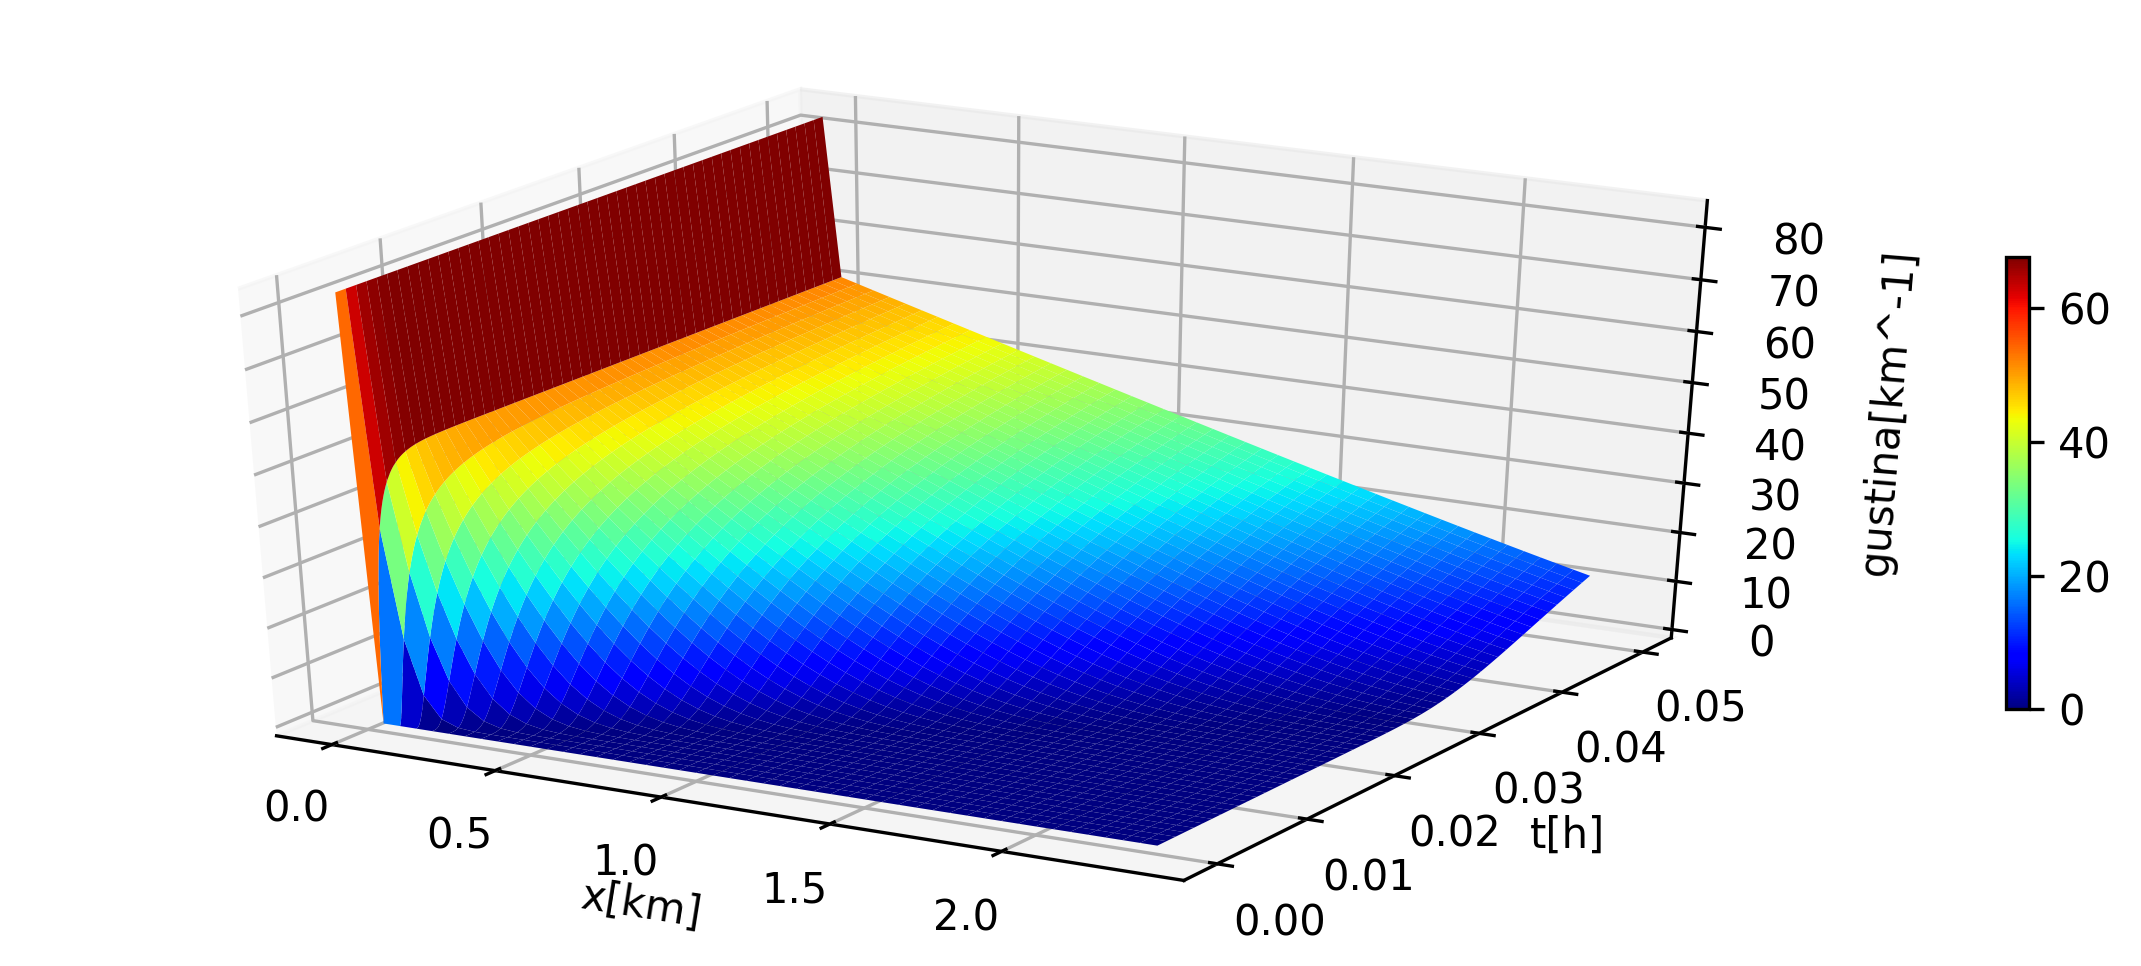

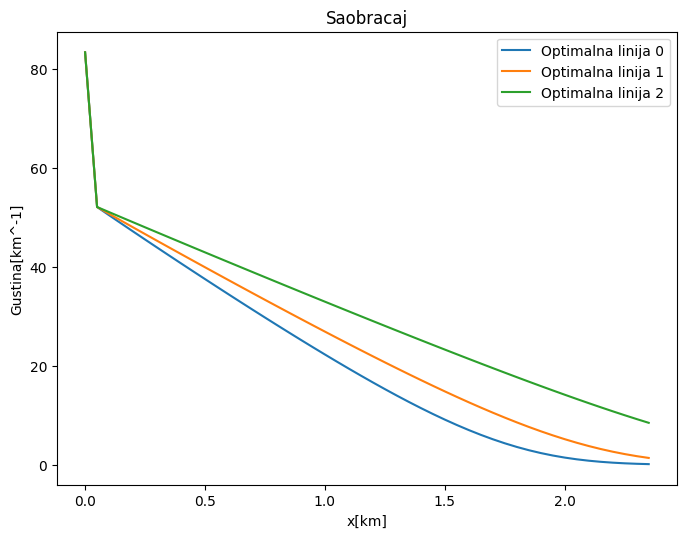

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(r, vm, rm):
    return vm*(1-2*r/rm)

L = 2.4
T = 180 / 3600
deltax = 0.05
deltat = 0.1 / 3600
rho0 = 0.8 * rm

x = np.arange(0, L, deltax)
t = np.arange(0, T, deltat)

dimx = np.size(x)
dimt = np.size(t)

rho = np.zeros((dimt, dimx))
rho[:,0] = rho0

for i in range(dimt - 1):
    for j in range(1, dimx, 1):
        rho[i + 1, j] = rho[i, j] - (f(rho[i, j], vm, rm) * (deltat/deltax) )* (rho[i, j] - rho[i, j - 1])
        
xosa, tosa = np.meshgrid(x, t)
fig = plt.figure(figsize = (10, 4), dpi = 300)
ax = fig.gca(projection = '3d')        
surf = ax.plot_surface(xosa, tosa, rho, cmap = cm.jet)
fig.colorbar(surf, shrink = 0.5)
ax.set_xlabel("x[km]")
ax.set_ylabel("t[h]")
ax.set_zlabel("gustina[km^-1]")
plt.show()  


t1 = [100, 120, 160]
t = np.array(t1)/3600
t = t / deltat

plt.figure(figsize = (8, 6), dpi = 100)
plt.title("Saobracaj")

for i in range(len(t)):
  plt.plot(x, rho[int(t[i]), :], label = "Optimalna linija " + str(i))

plt.xlabel("x[km]")
plt.ylabel("Gustina[km^-1]")
plt.legend()
plt.show()

U ovom primeru imamo da je najveca gustina dobija kod semafora (x = 0). Gustina ce se povecavati slicno kao u prethodnom slucaju, ali nikad nece opet dostici maksimalnu vrednost (vrednost kod semafora).